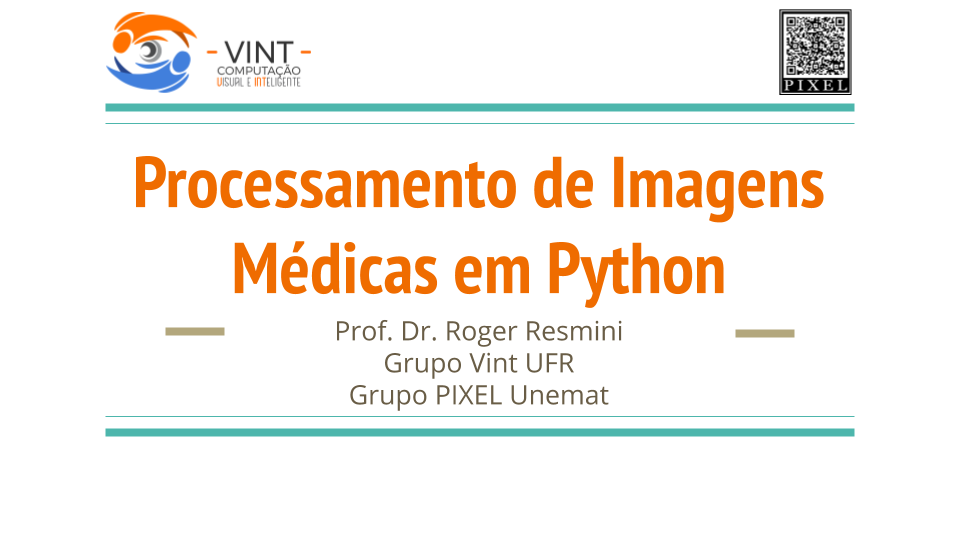

## SUMÁRIO

<ul>
    <li>Python (instalações)</li>
    <li>Scikit-Image (site e documentação)</li>
    <li>Visão geral do fluxo típico de processamento e análise de imagens médicas</li>
    <li>Mão na massa:</li>
    <ul>
        <li>Carregar uma imagem</li>
        <li>Pré-processamento</li>
        <li>Segmentação</li>
        <li>Extração de características</li>
    </ul>
</ul>

## Instalação do Python

Temos várias opções de instalação. Vou deixar aqui três possibilidades e me comprometo a fazer um vídeo no canal do Vint no YouTube realizando a instalação (https://www.youtube.com/channel/UCl8IuYE60sU4TCVNNYbBzDg?view_as=subscriber).  
<ul>
    <li><b>Python puro</b> (https://www.python.org/): versão mais enxuta. É indicado para quem não tem muito espaço em disco ou quem não quer instalar pacotes que não sabe se vai usar. Indicado também para quem não sabe se irá continuar usando Python.</li>
    <li><b>Anaconda</b> (https://www.anaconda.com/products/individual): Toolkit para Data Science. Literalmente uma "caixa de ferramentas". Tem tudo o que precisamos e possivelmente não será necessário instalar outro pacote.</li>
    <li><b>Miniconda</b> (https://docs.conda.io/en/latest/miniconda.html): versão menor que o Anaconda, mas que traz algumas coisas como o gerenciador de pacotes e ambientes virtuais CONDA.</li>
</ul>

Além do interpretador será necessário um editor de códigos. Para quem instalar o Anaconda ou o Miniconda já conta com o Jupyter Notebook (este editor interativo que estamos utilizando, https://jupyter.org/). No Anaconda ainda vem com o aplicativo Spyder.

Uma outra opção é o PyCharm (https://www.jetbrains.com/pt-br/pycharm/download/) da JetBrains, a mesma que construiu o Android Studio, o Web Storm e o PHP Storm. Tem uma versão grátis (community) e uma versão paga (pró). Estudantes e professores podem solicitar uma licença pró grátis mediante comprovação de vínculo e para atividades que não sejam comerciais. A versão pró tem muitos facilitadores, mas a versão community é um bom começo.

## Scikit-Image

Site: https://scikit-image.org/  
O Scikit (image, learn e video) é um conjunto de pacotes para processamento de imagens, aprendizado de máquina e recentemente processsamento de vídeo. Tem uma documentação bem feita e fácil de navegar.  
O principal concorrente é o OpenCV (https://opencv.org/) que é a biblioteca mais famosa e mais antiga para esta atividade. No entanto o OpenCV é uma biblioteca feita em C e a API Python da biblioteca força o desenvolvedor a escrever código Python pensando como programador C. O Scikit é pythônico e traz uma experiência melhor.  

## Ambientes Virtuais

Depois da instalação do interpretador Python é uma boa prática criar um ambiente virtual para trabalhar. Esse ambiente virtual é uma espécie de container em que o ambiente de programação que você criou ficará contido sem entrar em conflito com outros ambientes de programação.

O exemplo mais clássico que gosto de citar é "iniciei um projeto novo com a última versão do interpretador Python, a versão 3.8.1. Mas tenho um sistema legado feito na versão 2.7 que tenho que dar manutenção vez ou outra. Para não conflitar as versões diferentes no meu sistema e nem ter que criar várias máquinas virtuais que vão consumir mais recurso da minha máquina e atrasar meu processo de desenvolvimento eu posso criar ambientes virtuais em que cada ambiente tem seus próprios pacotes que podem ser de versões diferentes, inclusive versão diferente do interpretador."  

Para usar ambientes virtuais temos algumas opções no mercado:

#### PipEnv

https://pypi.org/project/pipenv/  
Quando instalamos o interpretador Python, o pip também é instalado. É o gerenciador de pacotes padrão do Python. Com ele podemos instalar o PipEnv para gerenciar ambientes virtuais.

#### VirtualEnv

https://docs.python.org/3/library/venv.html  
O VirtualEnv ou simplesmente venv é o gerenciador de ambientes virtuais padrão do Python. 

#### CondaEnv

https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html  
O Conda é instalado com a instalação do Anaconda ou Miniconda. O ambiente Conda é um gerenciador de pacotes, como o pip, e gerenciador de ambientes virtuais também. A principal vantagem do Conda, na minha experiência, é o fato de ele oferecer um gerenciamento mais dinâmico do que os outros gerenciadores de ambiente, além de integrar o gerenciamento de ambiente e o gerenciamento de pacotes.  
Nesse material vou focar no Conda. Seguem alguns comandos:

Inicialmente você precisa instalar o Conda com Anaconda ou Miniconda.

Depois precisamos criar o ambiente virtual com a versão do Python que queremos e instalar os pacotes necessários. No Jupyter Notebook podemos automatizar alguns passos como a instalação de pacotes chamando o Conda de dentro do Jupyter, mas a criação do ambiente e iniciaçlização do Jupyter tem que ser feita via terminal ou prompt.  
Para executar os comandos a seguir utilize o terminal (Linux ou Mac) ou prompt de comando (Windows) removendo as tags.

--name ou -n e em seguida o nome do ambiente que estamos criando

<code>conda create --name tuto-proc-img</code>

Podemos escolher uma versão específica do interpretador

<code>conda create -n tuto-proc-img python=3.8</code>

Podemos listar os ambientes criados

<code>!conda info --envs </code>

In [68]:
!conda info --envs

# conda environments:
#
base                  *  /usr/local/bin/anaconda3
api-bairros              /usr/local/bin/anaconda3/envs/api-bairros
codex                    /usr/local/bin/anaconda3/envs/codex
covid                    /usr/local/bin/anaconda3/envs/covid
curso                    /usr/local/bin/anaconda3/envs/curso
curso2                   /usr/local/bin/anaconda3/envs/curso2
curso3                   /usr/local/bin/anaconda3/envs/curso3



Depois de criar o ambiente temos que ativar o ambiente

<code>conda activate tuto-proc-img </code>

Temos agora que instalar os pacotes. Removendo as tags da célula a seguir podemos fazer a instalação direto no Jupyter Notebook. O comando a seguir irá instalar o pacote scikit-image no ambiente ativo.  
Dica: quando o comando tiver ! no início poderá ser executado no Jupyter Notebook.

<code>!conda install scikit-image</code>

Podemos ainda usar o pip caso o pacote não esteja disponível no Conda.

<code>!pip install scikit-image </code>

Ou podemos instalar os pacotes sem ativar o ambiente virtual.

<code>conda install -n tuto-proc-img scikit-image </code>

## Fluxo típico de processamento e análise de imagens médicas

<ol>
    <li>Aquisição das imagens</li>
    <blockquote>Para imagens que registram a luz visível podem ser usadas câmeras digitais, por exemplo. Ainda pode ser utilizado um scanner para digitalizar uma imagem impressa. Para imagens médicas utilizamos outros tipos de sensores: Raios X, Ressonância Magnética, Ultrassom, Termografia por infravermelho, etc. A aquisição é um processo delicado e deve ser planejado para que dê menos trabalho nas fases seguintes. Uma aquisição mal feita pode inviabilizar o restante do processo. Para se utilizar imagens com a finalidade de reconhecimento de padrões/aprendizado de máquina, a quantidade de imagens é importante, pois alguns algoritmos necessitam de uma amostra razoavelmente grande para "aprender" o comportamento do que queremos identificar. Existem vários bancos de imagens disponíveis na internet e outros fechados que foram criados por hospitais, por exemplo.</blockquote>
    <blockquote>Exemplos de bancos de imagens sobre câncer de mama:</blockquote>
    <blockquote>Termografia por Infravermelho</blockquote>
    <blockquote><a>http://visual.ic.uff.br/dmi/</a></blockquote>
    <blockquote>DDSM</blockquote>
    <blockquote><a>http://www.eng.usf.edu/cvprg/Mammography/Database.html</a></blockquote>
    <blockquote>MIAS</blockquote>
    <blockquote><a>http://peipa.essex.ac.uk/info/mias.html</a></blockquote>
    <li>Pré-processamento</li>
    <blockquote>Nesta etapa removemos elementos da imagem que irão atrapalhar a segmentação como fundo da termografia, clipes da mamografia, códigos de registro, etc.</blockquote>
    <li>Segmentação</li>
    <blockquote>Nesta etapa recortamos da imagem o segmento que iremos utilizar. Em uma aplicação de reconhecimento facial, por exemplo segmentamos a face para depois poder identificar de quem é a imagem. Na detecção de câncer de mama segmentamos as mamas. Na detecção de tumor pulmonar, segmentamos o pulmão. E assim por diante.</blockquote>
    <li>Extração de características</li>
    <blockquote>Nesta etapa são utilizadas alguns extratores de características. Podemos desenvolver os nossos ou utilizar extratores da literatura, depende do que queremos provar. Para análise de textura de imagens digitais um conjunto de extratores bastante conhecido são os extratores de Haralick<sup><b>1</b></sup> que vamos testar mais a frente.</blockquote>
    <li>Aprendizado de máquina</li>
    <blockquote>Nesta etapa enviamos as características que extraímos para o algoritmo de aprendizado de máquina. Existem 3 tipos principais de aprendizado: supervisionado, não supervisionado e por reforço. Tenho um episódio do meu podcast que explico com exemplo cada um deles<sup><b>2</b></sup>. Não entraremos em detalhes sobre isso neste tutorial porque será assunto para outro tutorial com o Prof. Caio.</blockquote>
    <li>Análise dos resultados</li>
    <blockquote>Dado que nosso algoritmo tem um desempenho<sup><b>*</b></sup> competitivo podemos passar uma mostra aleatória (imagem de algum exame) e ele dará um resultado, por exemplo na classificação de câncer de mama informar que existe câncer. Cabe ao profissional analisar a viabilidade da informação para proceder à tomada de decisão em saúde. Em um sistema de aprendizagem por reforço, a tomada de decisão do médico deve retornar ao sistema para que o sistema qualifique o resultado penalizando os erros e privilegiando os acertos, entre outras coisas.</blockquote>
</ol>

<b>[1]</b> HARALICK, Robert M.; SHANMUGAM, Karthikeyan; DINSTEIN, Its' Hak. <b>Textural features for image classification</b>. IEEE Transactions on systems, man, and cybernetics, n. 6, p. 610-621, 1973.  
<b>[2]</b> <a>https://anchor.fm/vint-podcast</a>  
<b>*</b> O desempenho pode ser medido de diversas maneiras e depende do que queremos medir.

## Mão na massa

### Carregar uma imagem

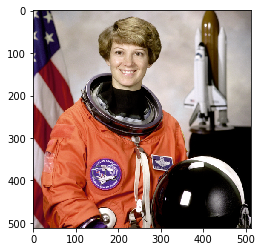

In [69]:
import matplotlib.pyplot as plt
from skimage import data

img = data.astronaut()
plt.imshow(img)
plt.show()

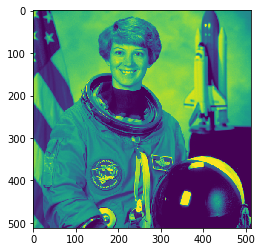

In [70]:
from skimage.color import rgb2gray

img_cinza = rgb2gray(img)
plt.imshow(img_cinza)
plt.show()

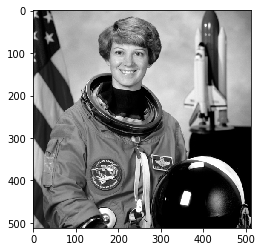

In [71]:
img_cinza = rgb2gray(img)
plt.imshow(img_cinza, cmap=plt.cm.gray)
plt.show()

#### Imprimir as matrizes

In [72]:
print(img)

[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [127 120 115]
  [120 117 106]
  [125 119 110]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [127 118 112]
  [124 115 108]
  [121 116 105]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [128 120 117]
  [126 116 112]
  [124 114 109]]

 ...

 [[186 170 176]
  [186 170 177]
  [183 168 170]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[183 169 170]
  [182 167 171]
  [185 164 176]
  ...
  [  0   0   1]
  [  1   1   1]
  [  0   0   0]]

 [[184 167 172]
  [183 165 169]
  [180 162 171]
  ...
  [  0   0   0]
  [  1   1   1]
  [  0   0   0]]]


#### Tamanho das matrizes e quantidade de canais:

In [73]:
print(img.shape)

(512, 512, 3)


In [74]:
img.shape

(512, 512, 3)

In [75]:
img_cinza.shape

(512, 512)

#### Tipo de estrutura:

In [76]:
type(img)

numpy.ndarray

#### Quantidade total de pixels da imagem:

In [77]:
img.size

786432

In [78]:
img_cinza.size

262144

#### Informações estatísticas da imagem:

In [79]:
img.min(), img.max()

(0, 255)

In [80]:
img.mean()

114.59900410970052

### Indexing

In [81]:
img = data.astronaut()

#### Pegar um pixel

In [82]:
img[10,20]

array([3, 1, 8], dtype=uint8)

#### Mudar o valor de um pixel

In [83]:
img[10,20] = 0

In [84]:
img[10,20]

array([0, 0, 0], dtype=uint8)

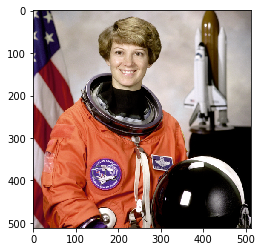

In [85]:
import matplotlib.pyplot as plt
from skimage import data

img = data.astronaut()
plt.imshow(img)
plt.show()

#### Mudar o tom de vários pixels:

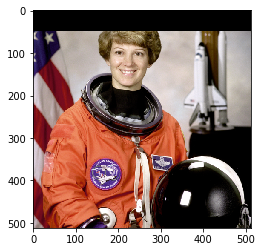

In [86]:
img[:50] = 0
plt.imshow(img)
plt.show()

#### Recarregar a imagem:

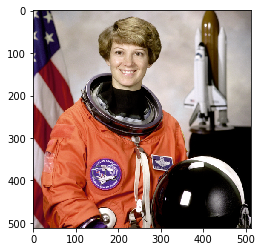

In [87]:
img = data.astronaut()
plt.imshow(img)
plt.show()

### Carregar uma imagem do disco

Imagem de mamografia.  
Fonte: https://saocarlosdigital.com.br/curso/ism-mamografia/  

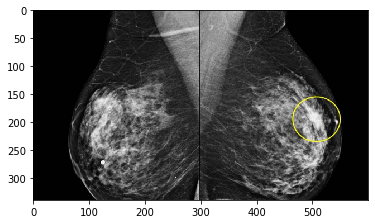

In [158]:
from skimage import io

mamo = io.imread('rdmc.jpeg')
plt.imshow(mamo)
plt.show()

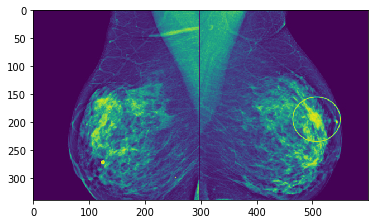

In [89]:
mamo = io.imread('rdmc.jpeg', as_gray=True)
plt.imshow(mamo)
plt.show()

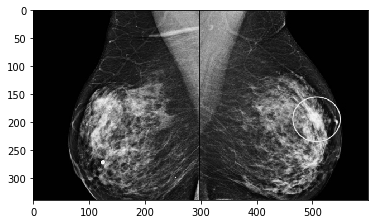

In [160]:
mamo = io.imread('rdmc.jpeg', as_gray=True)
plt.imshow(mamo, cmap=plt.cm.gray)
plt.show()

Imagem de Raios-X do pulmão.  
Fonte: https://img.olhardigital.com.br/uploads/acervo_imagens/2020/04/r16x9/20200424101317_1200_675_-_raio_x_pulmao.jpg

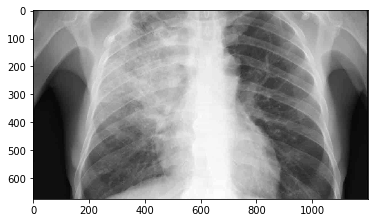

In [91]:
mamo = io.imread('raio_x_pulmao.jpg', as_gray=True)
plt.imshow(mamo, cmap=plt.cm.gray)
plt.show()

### Pré-processamento

#### Segmentação bobinha: segmentação por tom de cor

Imagem original (astronaut)

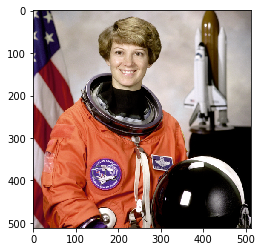

In [219]:
img = data.astronaut()
plt.imshow(img)
plt.show()

Pixel menor que 100 recebe o valor 0 (preto)

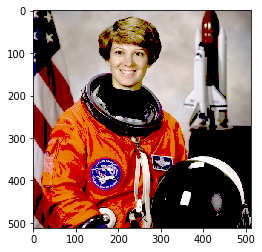

In [220]:
limiar = img < 100
img[limiar] = 0
plt.imshow(img)
plt.show()

In [221]:
img.shape

(512, 512, 3)

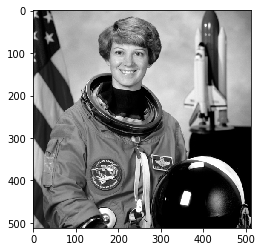

In [222]:
img_cinza = rgb2gray(data.astronaut())
plt.imshow(img_cinza, cmap=plt.cm.gray)
plt.show()

In [223]:
img_cinza.shape

(512, 512)

In [224]:
img_cinza

array([[5.83434902e-01, 4.14859216e-01, 2.44058431e-01, ...,
        4.75007843e-01, 4.58213333e-01, 4.69121961e-01],
       [6.75588235e-01, 5.56006667e-01, 4.49052941e-01, ...,
        4.68548627e-01, 4.56501176e-01, 4.55958431e-01],
       [7.66334902e-01, 7.00524314e-01, 6.49276078e-01, ...,
        4.76406667e-01, 4.62104314e-01, 4.53978431e-01],
       ...,
       [6.81696471e-01, 6.81979216e-01, 6.71889020e-01, ...,
        0.00000000e+00, 2.82745098e-04, 0.00000000e+00],
       [6.74694510e-01, 6.68532941e-01, 6.64030196e-01, ...,
        2.82745098e-04, 3.92156863e-03, 0.00000000e+00],
       [6.70482353e-01, 6.63189804e-01, 6.52838824e-01, ...,
        0.00000000e+00, 3.92156863e-03, 0.00000000e+00]])

In [225]:
img_cinza = rgb2gray(data.astronaut())
min, max = img_cinza.min(), img_cinza.max()

In [226]:
min

0.0

In [227]:
max

1.0

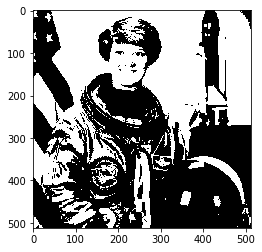

In [228]:
limiar = img_cinza > (max - min) / 2
img_cinza[limiar] = 255.0
plt.imshow(img_cinza, cmap=plt.cm.gray)
plt.show()

#### Agora vamos tentar com uma imagem melhor para isso:

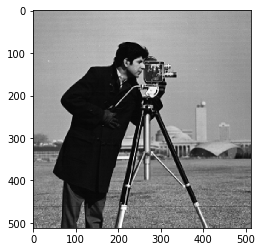

In [234]:
camera = data.camera()
plt.imshow(camera, cmap=plt.cm.gray)
plt.show()

In [235]:
camera.shape

(512, 512)

In [236]:
camera = rgb2gray(data.camera())
min, max = camera.min(), camera.max()

In [237]:
min

0

In [238]:
max

255

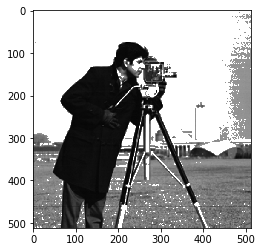

In [242]:
camera = rgb2gray(data.camera())
limiar = camera > 150
camera[limiar] = 255
plt.imshow(camera, cmap=plt.cm.gray)
plt.show()

In [244]:
camera = rgb2gray(data.camera())
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

#### Agora com uma imagem de Raios-X de pulmão

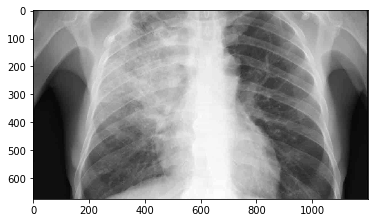

In [146]:
pulmao = io.imread('raio_x_pulmao.jpg', as_gray=True)
plt.imshow(pulmao, cmap=plt.cm.gray)
plt.show()

In [141]:
pulmao.shape

(675, 1200)

In [142]:
pulmao

array([[0.14117647, 0.21960784, 0.26666667, ..., 0.20784314, 0.07058824,
        0.        ],
       [0.14117647, 0.21960784, 0.26666667, ..., 0.20784314, 0.07058824,
        0.        ],
       [0.14117647, 0.21960784, 0.26666667, ..., 0.20784314, 0.07058824,
        0.        ],
       ...,
       [0.03921569, 0.03921569, 0.04313725, ..., 0.02745098, 0.01568627,
        0.00392157],
       [0.03921569, 0.03921569, 0.04313725, ..., 0.02745098, 0.01568627,
        0.00392157],
       [0.03921569, 0.03921569, 0.04313725, ..., 0.02745098, 0.01568627,
        0.00392157]])

In [143]:
from skimage.util import img_as_ubyte
pulmaog = img_as_ubyte(pulmao)
pulmaog

array([[36, 56, 68, ..., 53, 18,  0],
       [36, 56, 68, ..., 53, 18,  0],
       [36, 56, 68, ..., 53, 18,  0],
       ...,
       [10, 10, 11, ...,  7,  4,  1],
       [10, 10, 11, ...,  7,  4,  1],
       [10, 10, 11, ...,  7,  4,  1]], dtype=uint8)

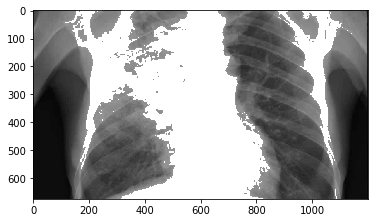

In [248]:
min, max = pulmaog.min(), pulmaog.max()
pulmaog = img_as_ubyte(pulmao)
limiar = pulmaog > 150
pulmaog[limiar] = 255
plt.imshow(pulmaog, cmap=plt.cm.gray)
plt.show()

### Segmentação

#### Detector de bordas

Imagem de Raios-X do pulmão

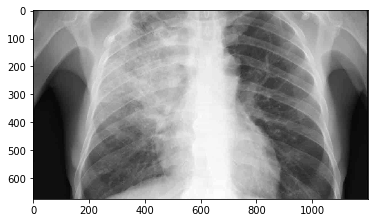

In [147]:
pulmao = io.imread('raio_x_pulmao.jpg', as_gray=True)
plt.imshow(pulmao, cmap=plt.cm.gray)
plt.show()

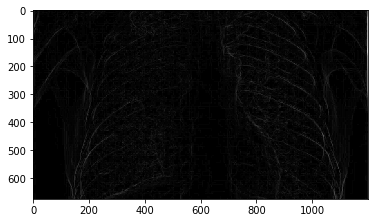

In [148]:
from skimage import filters

img_sobel = filters.sobel(pulmao)
plt.imshow(img_sobel, cmap=plt.cm.gray)
plt.show()

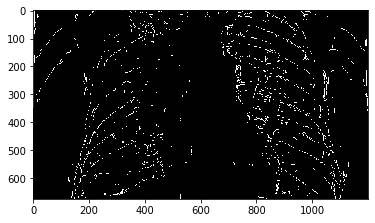

In [251]:
from skimage import feature

img_canny = feature.canny(pulmao, sigma=0.0) # sigma de 0.0 a 2.0
plt.imshow(img_canny, cmap=plt.cm.gray)
plt.show()

Imagem de mamografia

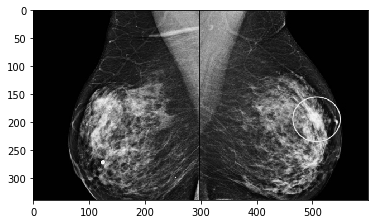

In [252]:
mamo = io.imread('rdmc.jpeg', as_gray=True)
plt.imshow(mamo, cmap=plt.cm.gray)
plt.show()

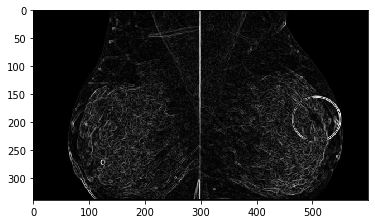

In [253]:
mamo_sobel = filters.sobel(mamo)
plt.imshow(mamo_sobel, cmap=plt.cm.gray)
plt.show()

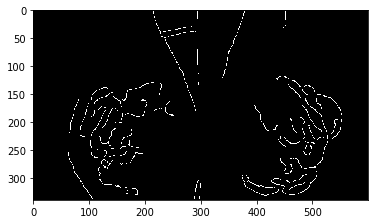

In [254]:
mamo_canny = feature.canny(mamo, sigma=4.0) # sigma de 0.0 a 4.0
plt.imshow(mamo_canny, cmap=plt.cm.gray)
plt.show()

### Extração de características

#### GLCM  
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

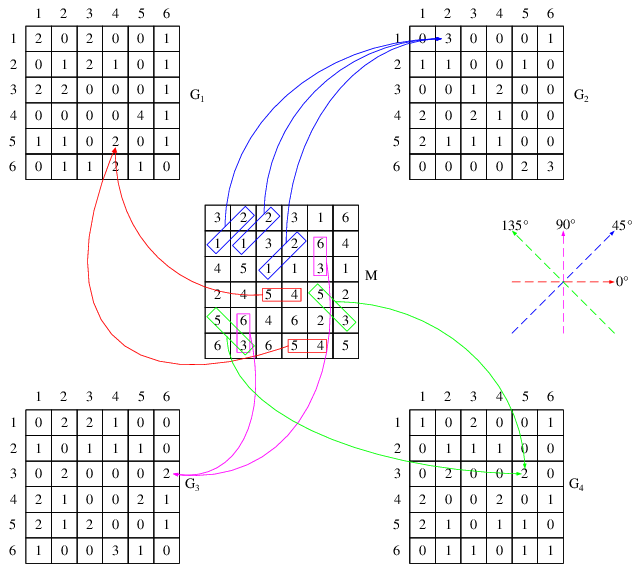

Fonte da imagem: Co-occurrence features and neural network classification approach for iris recognition - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/GLCM-matrix-formation-Different-directions-for-calculating-the-frequencies-of-various_fig1_323718838 [accessed 22 Sep, 2020]

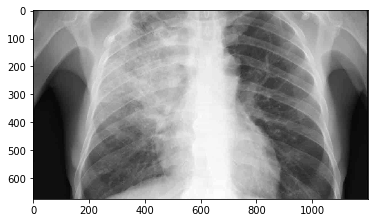

In [255]:
plt.imshow(pulmao, cmap=plt.cm.gray)
plt.show()

In [256]:
pulmao

array([[0.14117647, 0.21960784, 0.26666667, ..., 0.20784314, 0.07058824,
        0.        ],
       [0.14117647, 0.21960784, 0.26666667, ..., 0.20784314, 0.07058824,
        0.        ],
       [0.14117647, 0.21960784, 0.26666667, ..., 0.20784314, 0.07058824,
        0.        ],
       ...,
       [0.03921569, 0.03921569, 0.04313725, ..., 0.02745098, 0.01568627,
        0.00392157],
       [0.03921569, 0.03921569, 0.04313725, ..., 0.02745098, 0.01568627,
        0.00392157],
       [0.03921569, 0.03921569, 0.04313725, ..., 0.02745098, 0.01568627,
        0.00392157]])

In [181]:
pulmao2 = img_as_ubyte(pulmao)

In [257]:
pulmao2

array([[36, 56, 68, ..., 53, 18,  0],
       [36, 56, 68, ..., 53, 18,  0],
       [36, 56, 68, ..., 53, 18,  0],
       ...,
       [10, 10, 11, ...,  7,  4,  1],
       [10, 10, 11, ...,  7,  4,  1],
       [10, 10, 11, ...,  7,  4,  1]], dtype=uint8)

In [258]:
pmin, pmax = pulmao2.min(), pulmao2.max()
pmin

0

In [259]:
pmax

220

In [260]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops

Fonte: https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix

In [261]:
glcm = greycomatrix(pulmao2, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4]) #, levels=4)
glcm

array([[[[  0,   0, 529,   0]],

        [[  0,   0,   6, 109]],

        [[  0,   0,   0,   0]],

        ...,

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]]],


       [[[112, 109,   5,   0]],

        [[  0,   3, 192,   3]],

        [[  0,   0,   0,   0]],

        ...,

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]]],


       [[[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        ...,

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]]],


       ...,


       [[[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        ...,

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]]],


       [[[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        [[  0,   0,   0,   0]],

        ...,

        [[  0,   

In [266]:
glcm[:,:,0,0] # 0º

array([[  0,   0,   0, ...,   0,   0,   0],
       [112,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint32)

In [267]:
glcm[:,:,0,1] # 45º

array([[  0,   0,   0, ...,   0,   0,   0],
       [109,   3,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint32)

In [268]:
glcm[:,:,0,2] # 90º

array([[529,   6,   0, ...,   0,   0,   0],
       [  5, 192,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint32)

In [269]:
glcm[:,:,0,3] # 135º

array([[  0, 109,   0, ...,   0,   0,   0],
       [  0,   3,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint32)

Fonte: https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycoprops

Depois de calcular a GLCM podemos extrair os descritores de Haralick. A literatura aponta para 6 descritores mais significativos<sup>3</sup>:
<ul>
    <li>contrast</li>
    <li>dissimilarity</li>
    <li>homogeneity</li>
    <li>ASM</li>
    <li>energy</li>
    <li>correlation</li>
</ul>
<b>[3]</b> HARALICK, Robert M. <b>Statistical and structural approaches to texture</b>. Proceedings of the IEEE, v. 67, n. 5, p. 786-804, 1979.

In [271]:
vetor_caract = []
vetor_caract.append(greycoprops(glcm, 'contrast'))
vetor_caract.append(greycoprops(glcm, 'dissimilarity'))
vetor_caract.append(greycoprops(glcm, 'homogeneity'))
vetor_caract.append(greycoprops(glcm, 'ASM'))
vetor_caract.append(greycoprops(glcm, 'energy'))
vetor_caract.append(greycoprops(glcm, 'correlation'))
vetor_caract

[array([[ 6.78324283,  9.65691365,  3.58057122, 10.10317698]]),
 array([[1.16709604, 1.63808985, 0.91520277, 1.67116514]]),
 array([[0.65909111, 0.56140981, 0.71627   , 0.55891139]]),
 array([[0.00451871, 0.0039952 , 0.0048961 , 0.00399476]]),
 array([[0.06722136, 0.06320756, 0.06997211, 0.06320411]]),
 array([[0.99895827, 0.99851839, 0.99945161, 0.99844795]])]

O que mais eu posso fazer antes de levar ao classificador?

<ul>
    <li>Extrair características de todo o dataset de imagens</li>
    <li>Normalizar as características/atributos</li>
</ul>

# Finalizando

<ul>
    <li>Chuva do Caju (comunidade de inovação da região)</li>
        <ul>
            <li>10/10</li>
            <li>Dezembro</li>
        </ul>
    <li>Vint</li>
        <ul>
            <li>Plataforma de saúde do idoso - ideathon</li>
            <li>Twitter: @vint_si_ufr</li>
        </ul>
    <li>SI</li>
        <ul>
            <li>Lives toda semana (geralmente quinta)</li>
            <li>Canal do youtube: sistemas de informação ufr</li>
            <li>Aceitamos sugestões de tema</li>
            <li>Instagram: @si_ufr</li>
        </ul>
    <li>Colaborama</li>
        <ul>
            <li>@colaborama (insta e face) e site: colaborama.com.br</li>
        </ul>
</ul>

## Este arquivo está disponível em: https://github.com/vintgrupo/python-img